Attempt to clean the images

In [1]:
import tensorflow as tf
import random
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
from glob import glob 
import numpy as np
import os

tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
dataset_dir = 'training_data_final'

In [3]:
# Random seed for reproducibility
seed = 127
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [4]:

path_to_images = 'training_data_final/*/*.jpg'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
count = 1
#saving images in an array
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    trainingset.append(cv2.resize(cv2.imread(i),(96,96)))
    traininglabels.append(i.split('\\')[-2])
    count=count+1
trainingset = np.asarray(trainingset)
traininglabels = pd.DataFrame(traininglabels)

In [7]:
traininglabels

,0
0,Species1
1,Species1
2,Species1
3,Species1
4,Species1
...,...
3537,Species8
3538,Species8
3539,Species8
3540,Species8


In [ ]:
new_train = []
sets = []
getEx = True
j = 0
k = 1
for i in trainingset:
    j+=1
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (5,20,30)
    upper = (150,200,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    
    k = 1
    if traininglabels[0][j] == 'Species'+ str(k):
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()


new_train = np.asarray(new_train)

# for i in range(20):
#     plt.subplot(4,5,i+1)
#     plt.imshow(new_train[i])

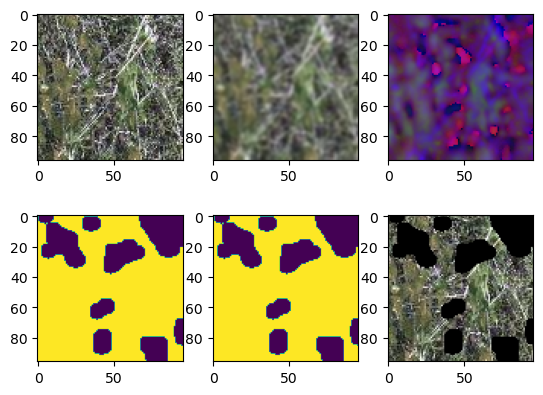

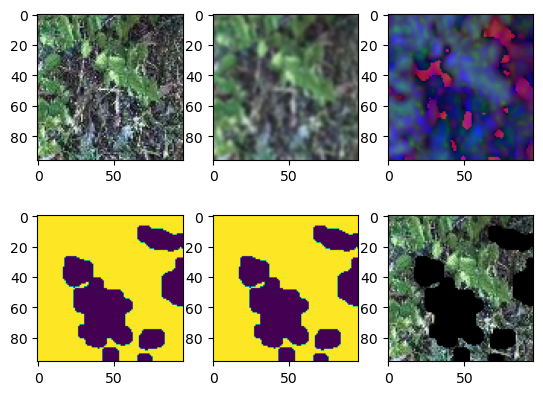

In [18]:
#sets = []
j = 2
k = 0
z = 0

for i in trainingset[np.where(traininglabels[0]=='Species2')]:
    z+=1
    
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,30,40)
    upper = (100,255,240)
    # lower = (5,30,40)
    # upper = (120,255,240)
    
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    #new_train.append(new)
    
    if k<j:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        k+=1

#new_train = np.asarray(new_train)

# # CLEANED IMAGES
# for i in range(20):
#     plt.subplot(4,5,i+1)
#     plt.imshow(new_train[i])

In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

In [ ]:
labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes'+str(labels.classes_))
encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))
traininglabels[0].value_counts().plot(kind='pie')

In [23]:
trainingset2 = trainingset
x_train,x_test,y_train,y_test = train_test_split(trainingset2,clearalllabels,test_size=0.1,random_state=seed,stratify=clearalllabels)

In [24]:
new_train = []
sets = []
getEx = True
j = 0
k = 1
for i in x_train:
    j+=1
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)

    lower = (5,20,30)
    upper = (150,200,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)



new_train = np.asarray(new_train)



In [25]:
np.shape(new_train)
x_train = new_train/255
x_test = x_test/255

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch = 128
generator = ImageDataGenerator(rotation_range = 20,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(x_train)

In [262]:
# Utility function to create folders and callbacks for training
from datetime import datetime

def create_folders_and_callbacks(model_name):

  exps_dir = os.path.join('model_data_preprocess')
  if not os.path.exists(exps_dir):
      os.makedirs(exps_dir)

  now = datetime.now().strftime('%b%d_%H-%M-%S')

  exp_dir = os.path.join(exps_dir, model_name + '_' + str(now))
  if not os.path.exists(exp_dir):
      os.makedirs(exp_dir)
      
  callbacks = []

  # Model checkpoint
  # ----------------
  ckpt_dir = os.path.join(exp_dir, 'ckpts')
  if not os.path.exists(ckpt_dir):
      os.makedirs(ckpt_dir)

  ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(ckpt_dir, 'cp.ckpt'), 
                                                     save_weights_only=True, # True to save only weights
                                                     save_best_only=False) # True to save only the best epoch 
  callbacks.append(ckpt_callback)

  # Visualize Learning on Tensorboard
  # ---------------------------------
  tb_dir = os.path.join(exp_dir, 'tb_logs')
  if not os.path.exists(tb_dir):
      os.makedirs(tb_dir)
      
  # By default shows losses and metrics for both training and validation
  tb_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_dir, 
                                               profile_batch=0,
                                               histogram_freq=1)  # if > 0 (epochs) shows weights histograms
  callbacks.append(tb_callback)

  # Early Stopping
  # --------------
  es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
  callbacks.append(es_callback)

  return callbacks

In [264]:
input_shape = (96, 96, 3)

In [265]:
def build_model(input_shape):
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    conv1 = tfkl.Conv2D(
        filters=24,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(input_layer)

    conv2 = tfkl.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(conv1)

    pool2 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv2)

    bn = tfkl.BatchNormalization()(pool2)

    conv3 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(bn)

    conv4 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(conv3)
    
    conv4 = tfkl.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(conv3)      

    pool4 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv4)

    bn = tfkl.BatchNormalization()(pool4)

    conv5 = tfkl.Conv2D(
        filters=96,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(bn)

    pool5 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv5)  

    bn = tfkl.BatchNormalization()(pool5)  
    
    conv6 = tfkl.Conv2D(
        filters=128,
        kernel_size=(3, 3),
        strides = (1, 1),
        padding = 'same',
        activation = 'relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(bn)

    pool6 = tfkl.MaxPooling2D(pool_size = (2, 2))(conv6)

    bn = tfkl.BatchNormalization()(pool6)    

    global_pool = tfkl.GlobalMaxPooling2D()(bn)

    dropout = tfkl.Dropout(0.2, seed=seed)(global_pool)

    classifier_layer = tfkl.Dense(
        units=512, 
        name='Classifier', 
        activation='relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(dropout)

    dropout = tfkl.Dropout(0.2, seed=seed)(classifier_layer)

    classifier_layer2 = tfkl.Dense(
        units=256, 
        name='Classifier2', 
        activation='relu',
        kernel_initializer = tfk.initializers.HeUniform(seed)
    )(dropout)

    dropout = tfkl.Dropout(0.2, seed=seed)(classifier_layer2)
    
    output_layer = tfkl.Dense(
        units=8, 
        activation='softmax', 
        kernel_initializer = tfk.initializers.GlorotUniform(seed),
        name='Output'
    )(dropout)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [282]:
model = build_model(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 24)        672       
                                                                 
 conv2d_8 (Conv2D)           (None, 96, 96, 32)        6944      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        18496 

In [283]:
# Create folders and callbacks and fit
callbacks = create_folders_and_callbacks(model_name='CNN_12_11_4')
x_train,x_test,y_train,y_test
epochs = 200
# Train the model
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 128,
    epochs = 200,
    validation_data = (x_test, y_test),
    callbacks = callbacks,
).history

Epoch 1/200
25/25 [==============================] - 97s 4s/step - loss: 3.1385 - accuracy: 0.2143 - val_loss: 2.5231 - val_accuracy: 0.1437
Epoch 2/200
25/25 [==============================] - 84s 3s/step - loss: 1.8041 - accuracy: 0.3131 - val_loss: 2.3670 - val_accuracy: 0.1493
Epoch 3/200
25/25 [==============================] - 88s 4s/step - loss: 1.5921 - accuracy: 0.3816 - val_loss: 1.9286 - val_accuracy: 0.2282
Epoch 4/200
25/25 [==============================] - 83s 3s/step - loss: 1.4515 - accuracy: 0.4340 - val_loss: 1.6615 - val_accuracy: 0.3099
Epoch 5/200
25/25 [==============================] - 84s 3s/step - loss: 1.3713 - accuracy: 0.4666 - val_loss: 1.7717 - val_accuracy: 0.2845
Epoch 6/200
25/25 [==============================] - 83s 3s/step - loss: 1.3121 - accuracy: 0.4898 - val_loss: 1.7241 - val_accuracy: 0.3155
Epoch 7/200
25/25 [==============================] - 80s 3s/step - loss: 1.2571 - accuracy: 0.5234 - val_loss: 1.5559 - val_accuracy: 0.3634
Epoch 8/200
2

In [ ]:
model.save("model_13_11/CNN_preprocess_plant")

INFO:tensorflow:Assets written to: model_12_11/CNN_12_11_2\assets


INFO:tensorflow:Assets written to: model_12_11/CNN_12_11_2\assets


In [ ]:
# Evaluate on validation set
# Trainined with no data augmentation
#model_ = tfk.models.load_model("model/CNN_bn_dropout")
model_test_metrics = model.evaluate([x_test, y_test], return_dict=True)

print()
print(model_test_metrics)